In [1]:
# Import Pandas library
import pandas as pd

# Read the dataset and store it as a dataframe called "df"
df = pd.read_csv(r'D:\Ashraf\NCI\Statistics for Data Analytics\Project\Description\CocoaPrice.csv')
df

,Date,Price
0,1994-10-01,1447.95
1,1994-11-01,1437.05
2,1994-12-01,1399.43
3,1995-01-01,1468.86
4,1995-02-01,1510.55
...,...,...
349,2023-11-01,3799.15
350,2023-12-01,3897.04
351,2024-01-01,4087.54
352,2024-02-01,5226.12


In [2]:
# Display the first 10 rows of the dataframe
df.head(10)

,Date,Price
0,1994-10-01,1447.95
1,1994-11-01,1437.05
2,1994-12-01,1399.43
3,1995-01-01,1468.86
4,1995-02-01,1510.55
5,1995-03-01,1484.91
6,1995-04-01,1469.26
7,1995-05-01,1445.32
8,1995-06-01,1437.14
9,1995-07-01,1364.10


In [3]:
# Check the datatype of the columns
df.dtypes

Date      object
Price    float64
dtype: object

In [4]:
# Convert the data column to date time format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Check the datatype of columns after conversion
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [6]:
# Check for null values
df.isnull().sum()

Date     0
Price    0
dtype: int64

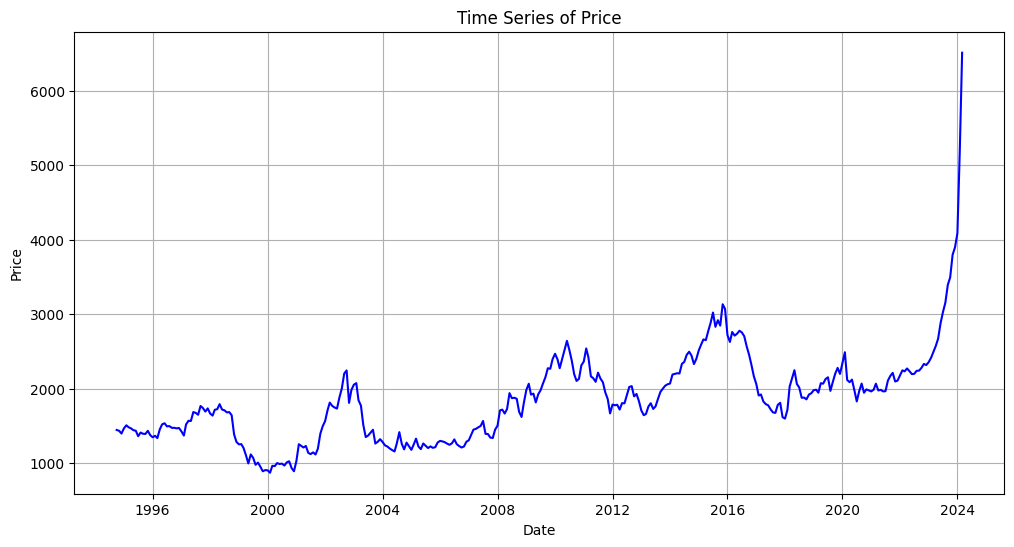

In [7]:
# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the graph for Time series of Price from original dataframe
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price', data=df, color='blue')
plt.title('Time Series of Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [8]:
# Calculate Rolling Statistics

# Rolling Mean
rolling_mean = df['Price'].rolling(window=12).mean()
print(rolling_mean)

# Rolling Standard Deviation
rolling_std = df['Price'].rolling(window=12).std()
print(rolling_std)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
349    2882.589167
350    3014.063333
351    3158.225833
352    3392.214167
353    3727.113333
Name: Price, Length: 354, dtype: float64
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
349     493.112352
350     537.604481
351     576.131721
352     781.771632
353    1139.657537
Name: Price, Length: 354, dtype: float64


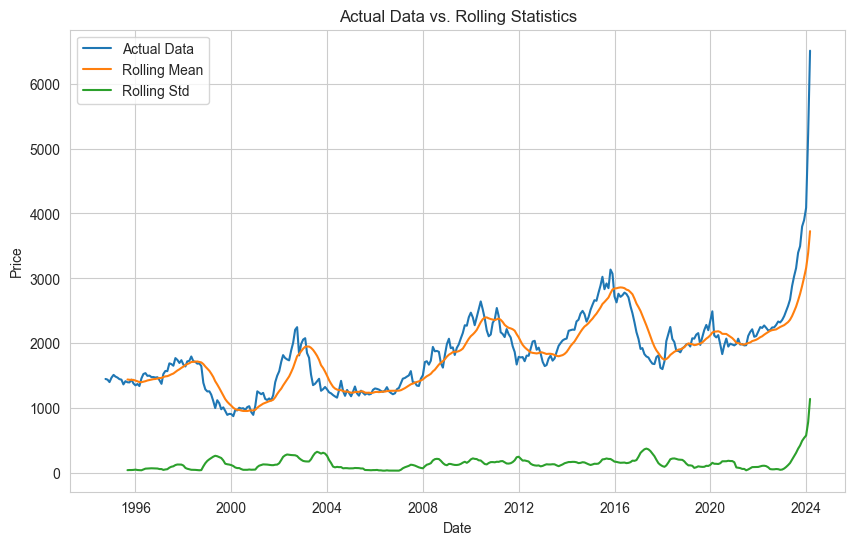

In [9]:
# Plot graph for relation between actual data vs rolling statistics
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.lineplot(x='Date', y='Price', data=df, label='Actual Data')
sns.lineplot(x='Date', y=rolling_mean, data=df, label='Rolling Mean')
sns.lineplot(x='Date', y=rolling_std, data=df, label='Rolling Std')

plt.title('Actual Data vs. Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

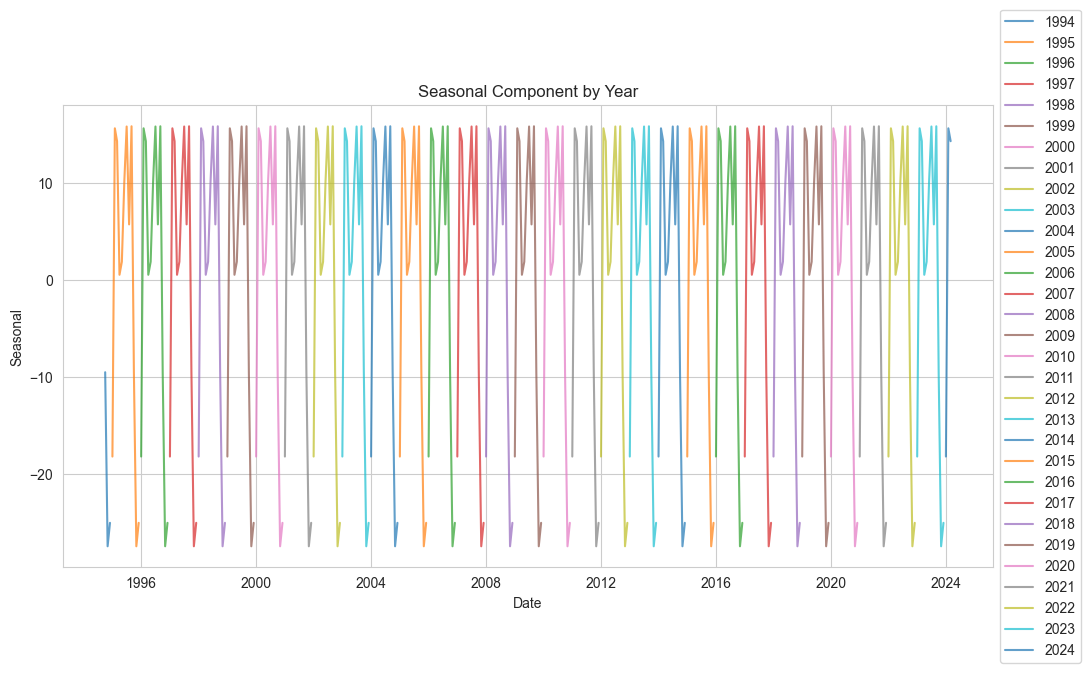

In [10]:
# Check for seasonal decompose

from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df['Price'], period=12)
years = df['Date'].dt.year.unique()


# plot the graph to visualize seasonal components by year
plt.figure(figsize=(12, 6))
for year in years:
    seasonal_component_year = decomp.seasonal[df['Date'].dt.year == year]
    sns.lineplot(x=df['Date'][df['Date'].dt.year == year], y=seasonal_component_year, label=year, alpha=0.7)

plt.title('Seasonal Component by Year')
plt.xlabel('Date')
plt.ylabel('Seasonal')

# Manually create legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

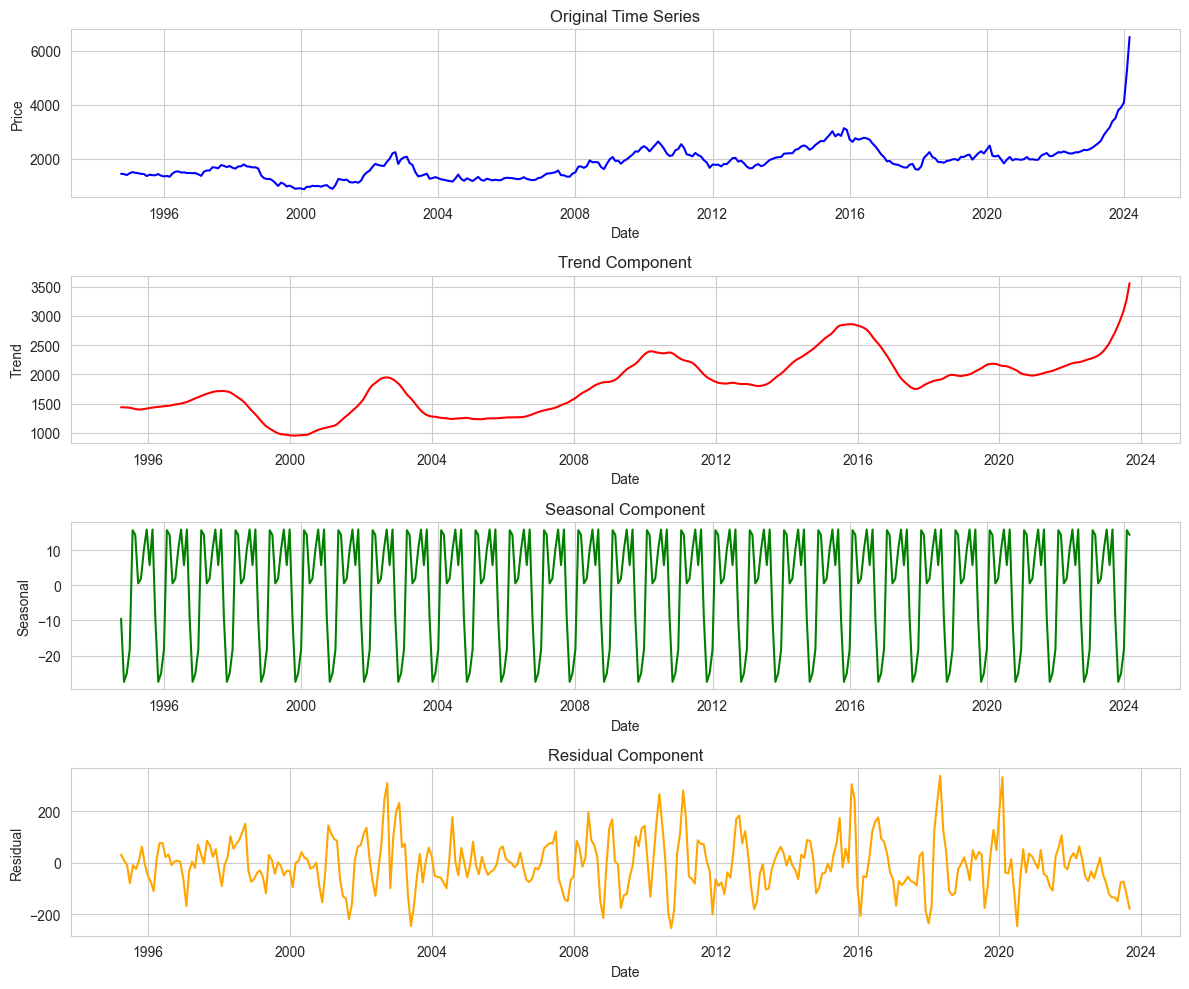

In [11]:
# Plot the graph for STL to understand Trend, Seasonal and Residual components

sns.set_style("whitegrid")

fig, axes = plt.subplots(4, 1, figsize=(12, 10))

sns.lineplot(ax=axes[0], x='Date', y='Price', data=df, color='blue')
axes[0].set_title('Original Time Series')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')

sns.lineplot(ax=axes[1], x='Date', y=decomp.trend.dropna(), data=df.dropna(), color='red')
axes[1].set_title('Trend Component')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Trend')

sns.lineplot(ax=axes[2], x='Date', y=decomp.seasonal.dropna(), data=df.dropna(), color='green')
axes[2].set_title('Seasonal Component')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Seasonal')

sns.lineplot(ax=axes[3], x='Date', y=decomp.resid.dropna(), data=df.dropna(), color='orange')
axes[3].set_title('Residual Component')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

In [12]:
# Stationarity test is performed using Augmented Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Price'])

adf_statistic = adf_result[0]
p_value = adf_result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('Reject the null hypothesis (H0): Time series is stationary')
else:
    print('Fail to reject the null hypothesis (H0): Time series is non-stationary')

ADF Statistic: 1.528717851494727
p-value: 0.9976271539962083
Fail to reject the null hypothesis (H0): Time series is non-stationary


In [13]:
# Since the p value is greater than 0.05, first difference is carried for the Price variable
df['Price_diff'] = df['Price'].diff()

df.dropna(inplace=True)

adf_result_diff = adfuller(df['Price_diff'])

adf_statistic_diff = adf_result_diff[0]
p_value_diff = adf_result_diff[1]

print(f'ADF Statistic (First Difference): {adf_statistic_diff}')
print(f'p-value (First Difference): {p_value_diff}')

if p_value_diff < 0.05:
    print('Reject the null hypothesis (H0): Differenced time series is stationary')
else:
    print('Fail to reject the null hypothesis (H0): Differenced time series is non-stationary')

ADF Statistic (First Difference): 0.07448145834557612
p-value (First Difference): 0.9642750135031487
Fail to reject the null hypothesis (H0): Differenced time series is non-stationary


In [14]:
# Since the p value is still greater than 0.05, second difference is carried for the Price variable
df['Price_diff_2'] = df['Price_diff'].diff()

df.dropna(inplace=True)

adf_result_diff_2 = adfuller(df['Price_diff_2'])

adf_statistic_diff_2 = adf_result_diff_2[0]
p_value_diff_2 = adf_result_diff_2[1]

print(f'ADF Statistic (Second Difference): {adf_statistic_diff_2}')
print(f'p-value (Second Difference): {p_value_diff_2}')

if p_value_diff_2 < 0.05:
    print('Reject the null hypothesis (H0): Second-differenced time series is stationary')
else:
    print('Fail to reject the null hypothesis (H0): Second-differenced time series is non-stationary')

ADF Statistic (Second Difference): -10.841824614684096
p-value (Second Difference): 1.6087080135308636e-19
Reject the null hypothesis (H0): Second-differenced time series is stationary


In [15]:
# After second difference, p value is less than 0.05 for the price variable which indicates that the data is stationary
df

,Date,Price,Price_diff,Price_diff_2
2,1994-12-01,1399.43,-37.62,-26.72
3,1995-01-01,1468.86,69.43,107.05
4,1995-02-01,1510.55,41.69,-27.74
5,1995-03-01,1484.91,-25.64,-67.33
6,1995-04-01,1469.26,-15.65,9.99
...,...,...,...,...
349,2023-11-01,3799.15,304.12,204.67
350,2023-12-01,3897.04,97.89,-206.23
351,2024-01-01,4087.54,190.50,92.61
352,2024-02-01,5226.12,1138.58,948.08


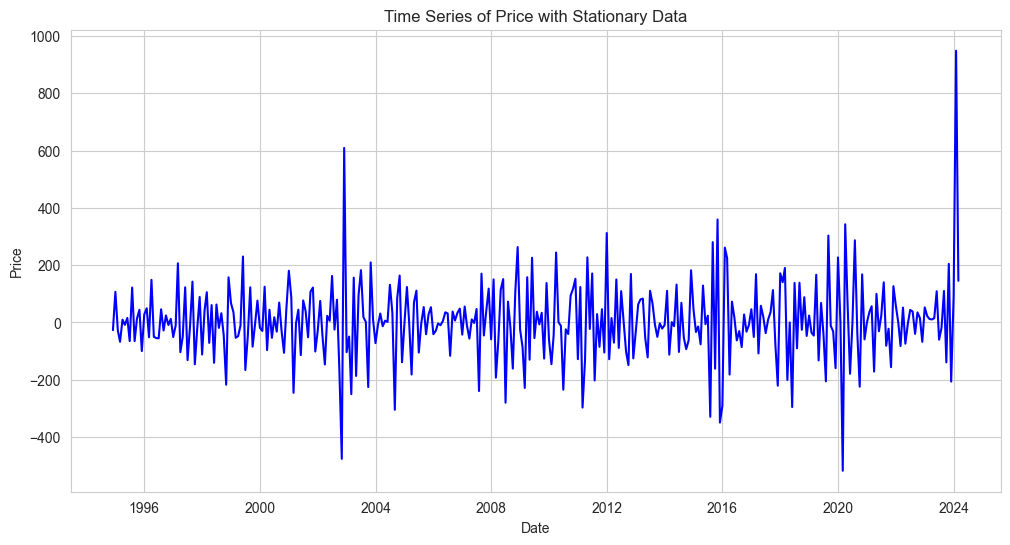

In [16]:
# Plot the graph for Time series of Price with stationary data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price_diff_2', data=df, color='blue')
plt.title('Time Series of Price with Stationary Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [17]:
# Calculate Rolling Statistics after making the data stationary

# Rolling Mean
rolling_mean_2 = df['Price_diff_2'].rolling(window=12).mean()
print(rolling_mean_2)

# Rolling Standard Deviation
rolling_std_2 = df['Price_diff_2'].rolling(window=12).std()
print(rolling_std_2)

2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
          ...    
349     20.940833
350      9.365000
351     12.688333
352     89.825833
353    100.910833
Name: Price_diff_2, Length: 352, dtype: float64
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
          ...    
349     91.550810
350    110.538217
351    112.541849
352    292.758462
353    292.079496
Name: Price_diff_2, Length: 352, dtype: float64


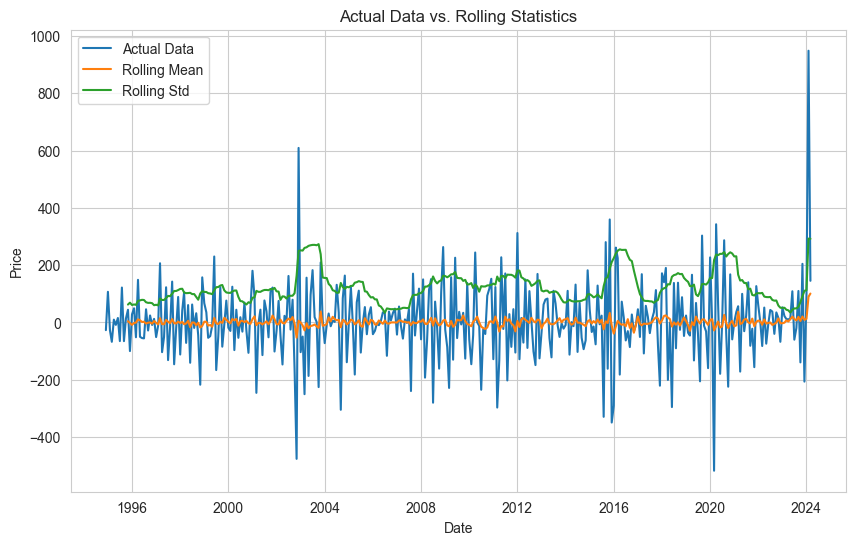

In [18]:
# Plot graph for relation between actual data vs rolling statistics
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.lineplot(x='Date', y='Price_diff_2', data=df, label='Actual Data')
sns.lineplot(x='Date', y=rolling_mean_2, data=df, label='Rolling Mean')
sns.lineplot(x='Date', y=rolling_std_2, data=df, label='Rolling Std')

plt.title('Actual Data vs. Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

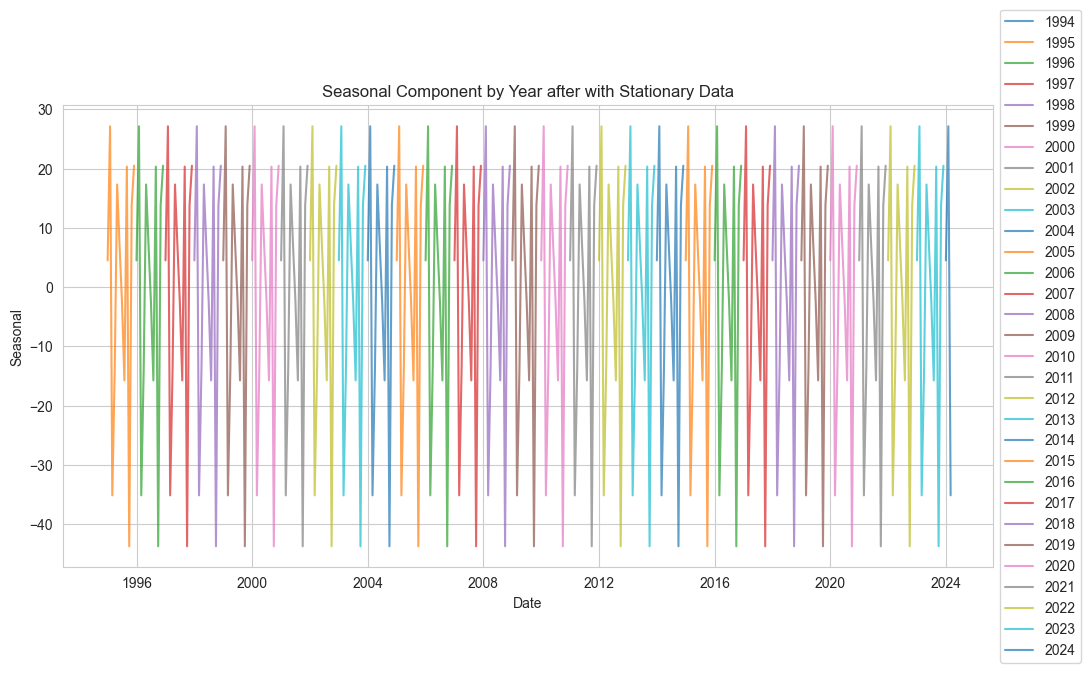

In [19]:
# Check for seasonal decompose after making the data stationary
decomp = seasonal_decompose(df['Price_diff_2'], period=12)
years = df['Date'].dt.year.unique()


# plot the graph to visualize seasonal components by year
plt.figure(figsize=(12, 6))
for year in years:
    seasonal_component_year = decomp.seasonal[df['Date'].dt.year == year]
    sns.lineplot(x=df['Date'][df['Date'].dt.year == year], y=seasonal_component_year, label=year, alpha=0.7)

plt.title('Seasonal Component by Year after with Stationary Data')
plt.xlabel('Date')
plt.ylabel('Seasonal')

# Manually create legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

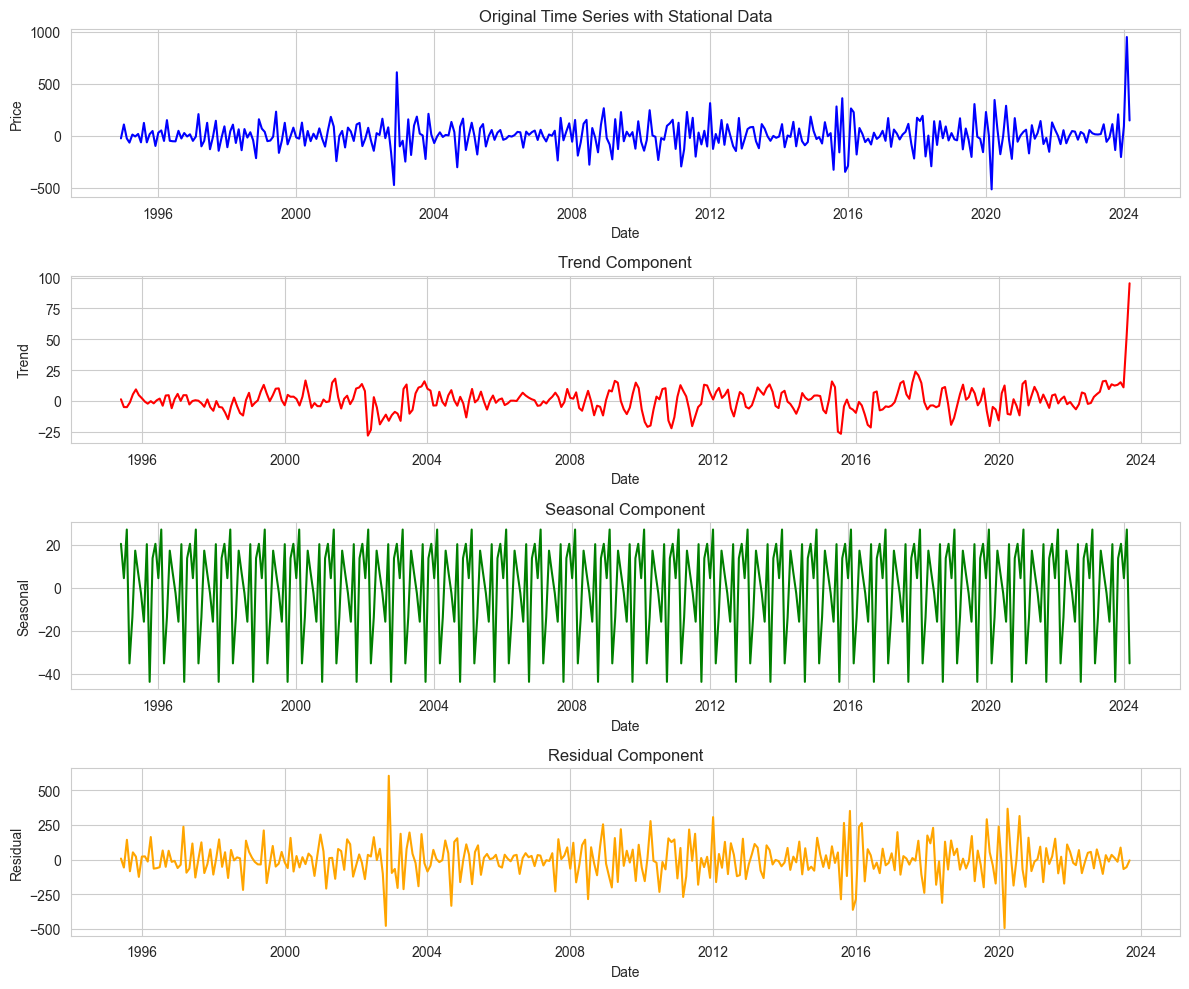

In [20]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(4, 1, figsize=(12, 10))

sns.lineplot(ax=axes[0], x='Date', y='Price_diff_2', data=df, color='blue')
axes[0].set_title('Original Time Series with Stational Data')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')

sns.lineplot(ax=axes[1], x='Date', y=decomp.trend.dropna(), data=df.dropna(), color='red')
axes[1].set_title('Trend Component')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Trend')

sns.lineplot(ax=axes[2], x='Date', y=decomp.seasonal.dropna(), data=df.dropna(), color='green')
axes[2].set_title('Seasonal Component')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Seasonal')

sns.lineplot(ax=axes[3], x='Date', y=decomp.resid.dropna(), data=df.dropna(), color='orange')
axes[3].set_title('Residual Component')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

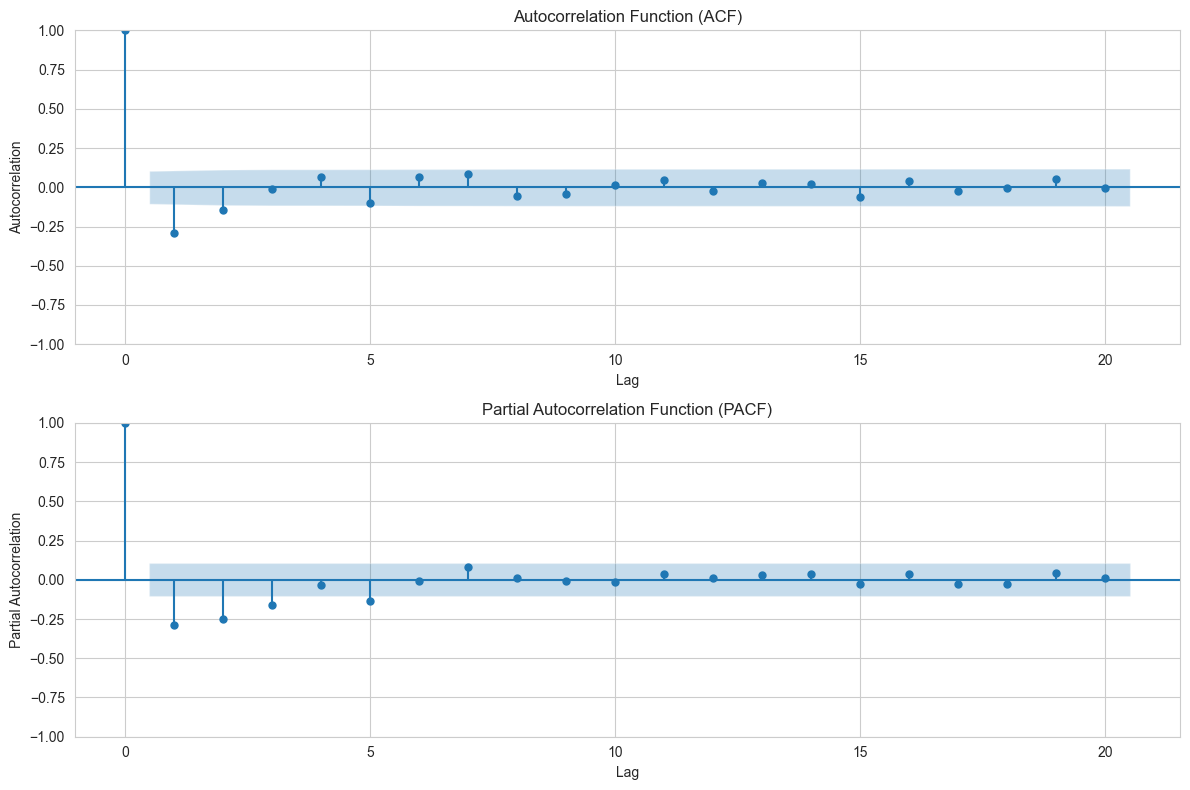

In [21]:
# Plot graphs to understand autocorrelation using Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(df['Price_diff_2'].dropna(), lags=20, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['Price_diff_2'].dropna(), lags=20, ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Modelling

# Mean Method

In [22]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Split the data into train and test
train_data = df[df['Date'] <= '2023-09-01']
test_data = df[(df['Date'] >= '2023-10-01') & (df['Date'] <= '2024-03-01')]

# Mean Model
mean_value = train_data['Price_diff_2'].mean()
mean_forecast = np.repeat(mean_value, len(test_data['Price_diff_2']))

# Evaluate metrics for mean model
mean_mae = mean_absolute_error(test_data['Price_diff_2'], mean_forecast)
mean_mse = mean_squared_error(test_data['Price_diff_2'], mean_forecast)
mean_rmse = np.sqrt(mean_mse)
mean_mape = mean_absolute_percentage_error(test_data['Price_diff_2'], mean_forecast)

# Print the metrics
print('Mean Model:')
print(f"Mean Absolute Error for Mean Forecast: {mean_mae}")
print(f"Mean Squared Error for Mean Forecast: {mean_mse}")
print(f"Root Mean Squared Error for Mean Forecast {mean_rmse}")
print(f"Mean Absolute Percentage Error for Mean Forecast: {mean_mape}")

Mean Model:
Mean Absolute Error for Mean Forecast: 289.122986512524
Mean Squared Error for Mean Forecast: 171810.69504539852
Root Mean Squared Error for Mean Forecast 414.50053684573015
Mean Absolute Percentage Error for Mean Forecast: 0.9986087630163539


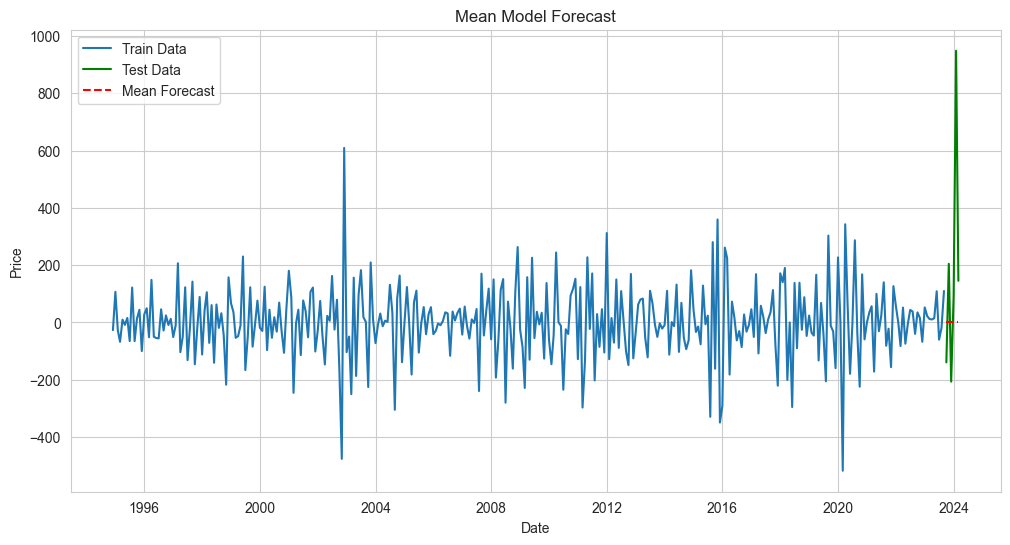

In [23]:
# Visualization of actual and forecasted values for Mean model 

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price_diff_2', data=train_data, label='Train Data')
sns.lineplot(x='Date', y='Price_diff_2', data=test_data, label='Test Data', color='green')
sns.lineplot(x=test_data['Date'], y=mean_forecast, label='Mean Forecast', linestyle='--', color='red')
plt.title('Mean Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Naive Method

In [24]:
# Split the data into train and test
train_data = df[df['Date'] <= '2023-09-01']
test_data = df[(df['Date'] >= '2023-10-01') & (df['Date'] <= '2024-03-01')]

# Naive model
last_observed_value = train_data['Price_diff_2'].iloc[-1]
naive_forecast = np.repeat(last_observed_value, len(test_data))

# Evaluate the metrics for naive model
naive_mae = mean_absolute_error(test_data['Price_diff_2'], naive_forecast)
naive_mse = mean_squared_error(test_data['Price_diff_2'], naive_forecast)
naive_rmse = np.sqrt(naive_mse)
naive_mape = mean_absolute_percentage_error(test_data['Price_diff_2'], naive_forecast)

# Print the metrics
print('Naive Model:')
print(f"Mean Absolute Error for Naive Forecast: {naive_mae}")
print(f"Mean Squared Error for Naive Forecast: {naive_mse}")
print(f"Root Mean Squared Error for Naive Forecast: {naive_rmse}")
print(f"Mean Absolute Percentage Error for Naive Forecast: {naive_mape}")

Naive Model:
Mean Absolute Error for Naive Forecast: 258.49333333333317
Mean Squared Error for Naive Forecast: 145829.19976666663
Root Mean Squared Error for Naive Forecast: 381.87589576545236
Mean Absolute Percentage Error for Naive Forecast: 0.850332149649815


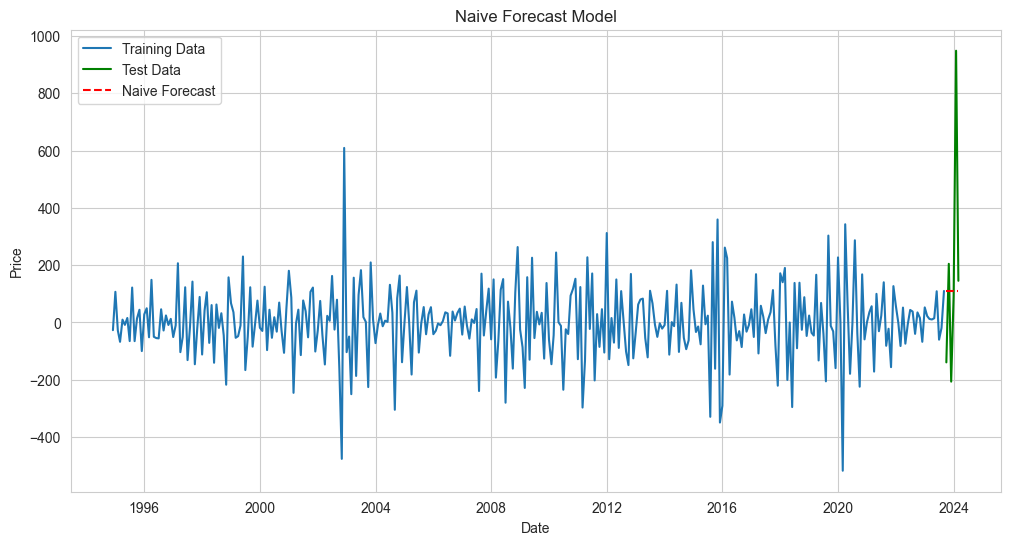

In [25]:
# Visualization of actual and forecasted values for Naive model 
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price_diff_2', data=train_data, label='Training Data')
sns.lineplot(x='Date', y='Price_diff_2', data=test_data, label='Test Data', color='green')
sns.lineplot(x=test_data['Date'], y=naive_forecast, label='Naive Forecast', linestyle='--', color='red')
plt.title('Naive Forecast Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Seasonal Naive Method

In [26]:
# Split the data into train and test
train_data = df[df['Date'] <= '2023-09-01']
test_data = df[(df['Date'] >= '2023-10-01') & (df['Date'] <= '2024-03-01')]

# Seasonal naive forecast
def seasonal_naive_forecast(train, test):
    seasonal_naive_forecasts = []
    last_season = train['Price_diff_2'].iloc[-12:].values
    for i in range(len(test)):
        forecast = last_season[i % 12]
        seasonal_naive_forecasts.append(forecast)
    return seasonal_naive_forecasts

# Calculate seasonal naive forecasts
seasonal_naive_forecasts = seasonal_naive_forecast(train_data, test_data)

# Evaluate metrics for seasonal naive model
seasonal_naive_mae = mean_absolute_error(test_data['Price_diff_2'], seasonal_naive_forecasts)
seasonal_naive_mse = mean_squared_error(test_data['Price_diff_2'], seasonal_naive_forecasts)
seasonal_naive_rmse = np.sqrt(seasonal_naive_mse)
seasonal_naive_mape = mean_absolute_percentage_error(test_data['Price_diff_2'], seasonal_naive_forecasts)

# Print the metrics
print('Seasonal Naive Model:')
print(f"Mean Absolute Error for Seasonal Naive Forecast: {seasonal_naive_mae}")
print(f"Mean Squared Error for Seasonal Naive Forecast: {seasonal_naive_mse}")
print(f"Root Mean Squared Error for Seasonal Naive Forecast: {seasonal_naive_rmse}")
print(f"Mean Absolute Percentage Error for Seasonal Naive Forecast: {seasonal_naive_mape}")

Seasonal Naive Model:
Mean Absolute Error for Seasonal Naive Forecast: 266.77833333333325
Mean Squared Error for Seasonal Naive Forecast: 160245.92331666668
Root Mean Squared Error for Seasonal Naive Forecast: 400.30728611488786
Mean Absolute Percentage Error for Seasonal Naive Forecast: 0.8618067414647163


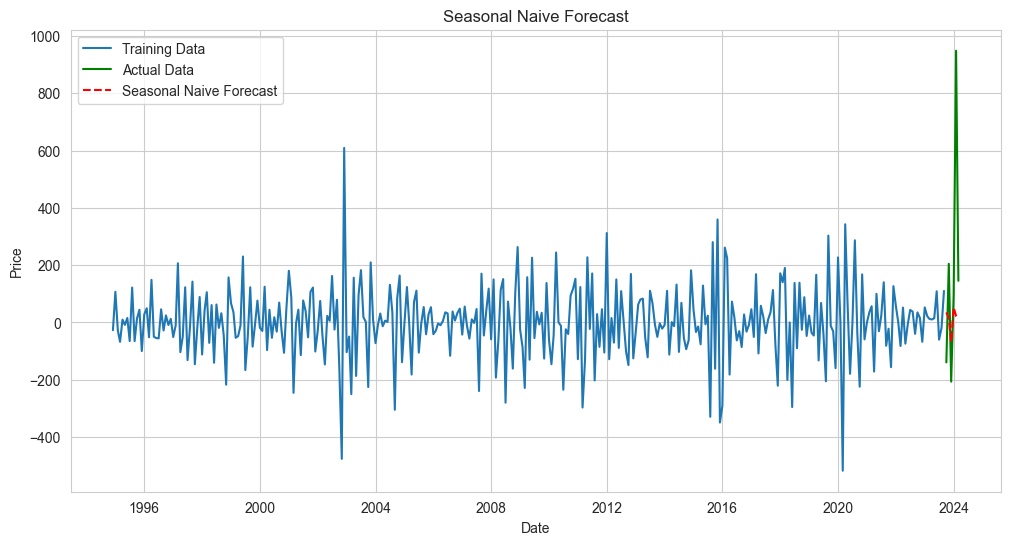

In [27]:
# Visualization of actual and forecasted values for seasonal naive model 
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price_diff_2', data=train_data, label='Training Data')
sns.lineplot(x='Date', y='Price_diff_2', data=test_data, label='Actual Data', color='green')
sns.lineplot(x=test_data['Date'], y=seasonal_naive_forecasts, label='Seasonal Naive Forecast', linestyle='--', color='red')
plt.title('Seasonal Naive Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Simple Exponential Smoothing Method

In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Split the data into train and test
train_data = df[df['Date'] <= '2023-09-01']
test_data = df[(df['Date'] >= '2023-10-01') & (df['Date'] <= '2024-03-01')]

# Fit Simple Exponential Smoothing model
model_ses = SimpleExpSmoothing(train_data['Price_diff_2']).fit()
ses_forecast = model_ses.forecast(len(test_data))

# Calculate metrics for SES Model
ses_mae = mean_absolute_error(test_data['Price_diff_2'], ses_forecast)
ses_mse = mean_squared_error(test_data['Price_diff_2'], ses_forecast)
ses_rmse = np.sqrt(ses_mse)
ses_mape = mean_absolute_percentage_error(test_data['Price_diff_2'], ses_forecast)

# Prin the metrics
print("Simple Exponential Smoothing Model:")
print(f"Mean Absolute Error for SES Forecast: {ses_mae}")
print(f"Mean Squared Error for SES Forecast: {ses_mse}")
print(f"Root Mean Squared Error for SES Forecast: {ses_rmse}")
print(f"Mean Absolute Percentage Error for SES Forecast: {ses_mape}")

Simple Exponential Smoothing Model:
Mean Absolute Error for SES Forecast: 289.27284944078974
Mean Squared Error for SES Forecast: 171966.924529048
Root Mean Squared Error for SES Forecast: 414.68894912819655
Mean Absolute Percentage Error for SES Forecast: 0.9994762379743282


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


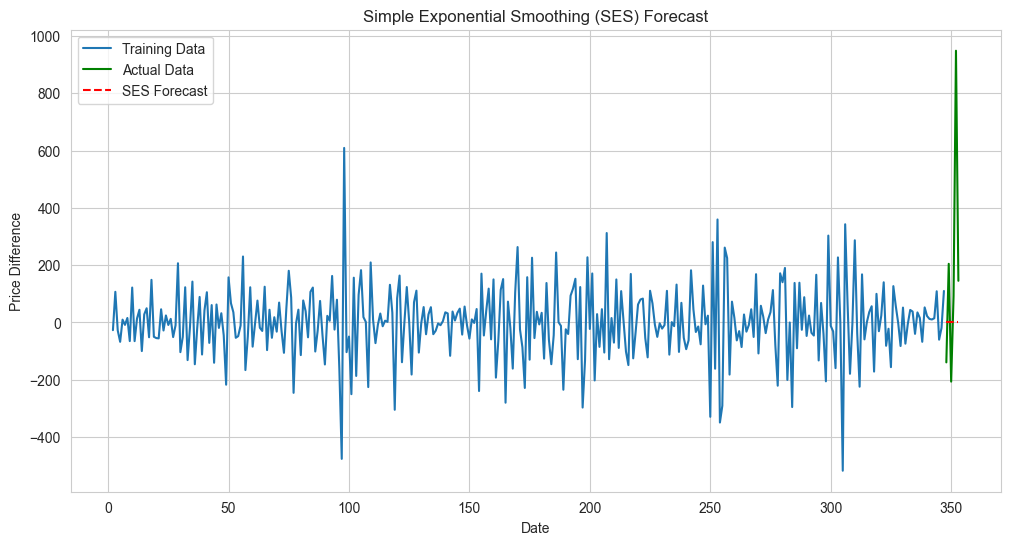

In [29]:
# # Visualization of actual and forecasted values for Simple Exponential Smoothing (SES) Forecast
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_data.index, y=train_data['Price_diff_2'], label='Training Data')
sns.lineplot(x=test_data.index, y=test_data['Price_diff_2'], label='Actual Data', color='green')
sns.lineplot(x=test_data.index, y=ses_forecast, label='SES Forecast', linestyle='--', color='red')
plt.title('Simple Exponential Smoothing (SES) Forecast')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.show()

# Holt's Linear (Double Exponential) Method

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Split the data into train and test
train_data = df[df['Date'] <= '2023-09-01']
test_data = df[(df['Date'] >= '2023-10-01') & (df['Date'] <= '2024-03-01')]

# Fit Holt's Method model
model_double_expo = ExponentialSmoothing(train_data['Price_diff_2'], trend='add').fit()
double_expo_forecast = model_double_expo.forecast(len(test_data))

# Calculate metrics for Holt's Linear (Double Exponential) Method
double_expo_mae = mean_absolute_error(test_data['Price_diff_2'], double_expo_forecast)
double_expo_mse = mean_squared_error(test_data['Price_diff_2'], double_expo_forecast)
double_expo_rmse = np.sqrt(double_expo_mse)
double_expo_mape = mean_absolute_percentage_error(test_data['Price_diff_2'], double_expo_forecast)

# Print the metrics
print("Holt's Linear (Double Exponential Smoothing) Model:")
print(f"Mean Absolute Error for Holt's Linear Forecast: {double_expo_mae}")
print(f"Mean Squared Error for Holt's Linear Forecast: {double_expo_mse}")
print(f"Root Mean Squared Error for Holt's Linear Forecast: {double_expo_rmse}")
print(f"Mean Absolute Percentage Error for Holt's Linear Forecast: {double_expo_mape}")


Holt's Linear (Double Exponential Smoothing) Model:
Mean Absolute Error for Holt's Linear Forecast: 286.739240473798
Mean Squared Error for Holt's Linear Forecast: 169438.3291349741
Root Mean Squared Error for Holt's Linear Forecast: 411.62887305796966
Mean Absolute Percentage Error for Holt's Linear Forecast: 0.9847394025925044


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


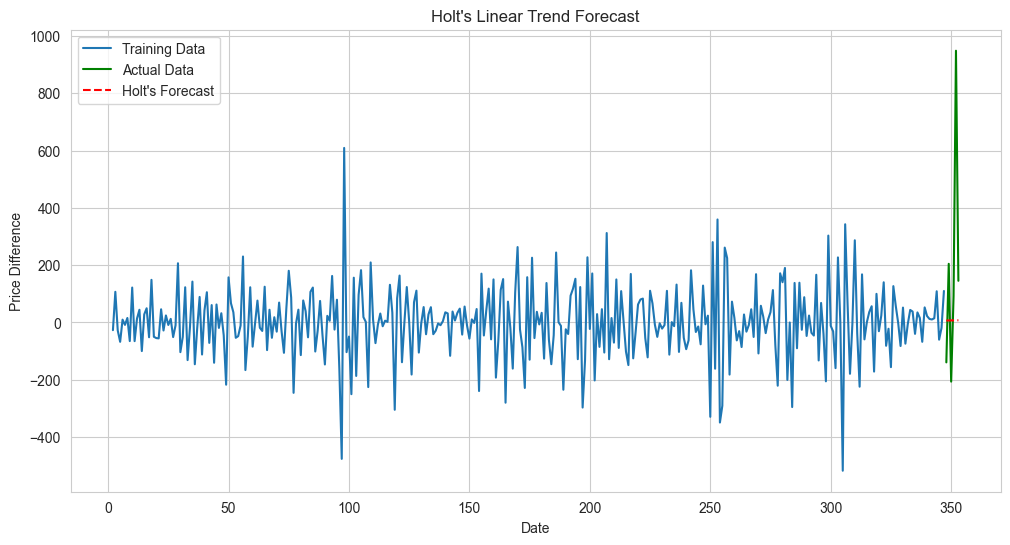

In [31]:
# Visualization of actual and forecasted values for Holt's Linear (Double Exponential Smoothing) Model
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x=train_data.index, y=train_data['Price_diff_2'], label='Training Data')
sns.lineplot(x=test_data.index, y=test_data['Price_diff_2'], label='Actual Data', color='green')
sns.lineplot(x=test_data.index, y=double_expo_forecast, label="Holt's Forecast", linestyle='--', color='red')
plt.title("Holt's Linear Trend Forecast")
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.show()

# Holt-Winters (Triple Exponential) Method

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Split the data into train and test
train_data = df[df['Date'] <= '2023-09-01']
test_data = df[(df['Date'] >= '2023-10-01') & (df['Date'] <= '2024-03-01')]

# Fit Holt-Winters' Method model
model_hw = ExponentialSmoothing(train_data['Price_diff_2'], trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = model_hw.forecast(len(test_data))

# Calculate metrics for Holt-Winters (Triple Exponential) Method
hw_mae = mean_absolute_error(test_data['Price_diff_2'], hw_forecast)
hw_mse = mean_squared_error(test_data['Price_diff_2'], hw_forecast)
hw_rmse = np.sqrt(hw_mse)
hw_mape = mean_absolute_percentage_error(test_data['Price_diff_2'], hw_forecast)

# Print the metrics
print("Holt-Winters' (Triple Exponential Smoothing) Model:")
print(f"Mean Absolute Error for Holt-Winters' Forecast: {hw_mae}")
print(f"Mean Squared Error for Holt-Winters' Forecast: {hw_mse}")
print(f"Root Mean Squared Error for Holt-Winters' Forecast: {hw_rmse}")
print(f"Mean Absolute Percentage Error for Holt-Winters' Forecast: {hw_mape}")

Holt-Winters' (Triple Exponential Smoothing) Model:
Mean Absolute Error for Holt-Winters' Forecast: 275.27477782067086
Mean Squared Error for Holt-Winters' Forecast: 160619.9668095735
Root Mean Squared Error for Holt-Winters' Forecast: 400.77420926199017
Mean Absolute Percentage Error for Holt-Winters' Forecast: 0.9233049262617189


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


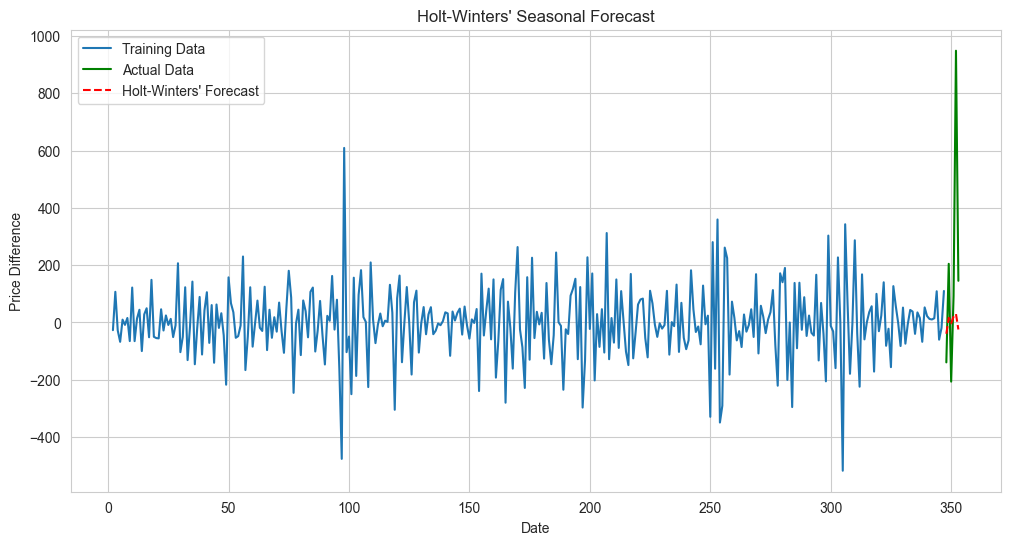

In [33]:
# Visualization of actual and forecasted values for Holt-Winters (Triple Exponential) Method 
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_data.index, y=train_data['Price_diff_2'], label='Training Data')
sns.lineplot(x=test_data.index, y=test_data['Price_diff_2'], label='Actual Data', color='green')
sns.lineplot(x=test_data.index, y=hw_forecast, label="Holt-Winters' Forecast", linestyle='--', color='red')
plt.title("Holt-Winters' Seasonal Forecast")
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.show()

# ARIMA Method

In [34]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into train and test
train_data = df[df['Date'] <= '2023-09-01']
test_data = df[(df['Date'] >= '2023-10-01') & (df['Date'] <= '2024-03-01')]

# Fit ARIMA model
model_arima = ARIMA(train_data['Price_diff_2'], order=(1, 0, 0)).fit()
arima_forecast = model_arima.forecast(steps=len(test_data))

# Calculate metrics for ARIMA model
arima_mae = mean_absolute_error(test_data['Price_diff_2'], arima_forecast)
arima_mse = mean_squared_error(test_data['Price_diff_2'], arima_forecast)
arima_rmse = np.sqrt(arima_mse)
arima_mape = mean_absolute_percentage_error(test_data['Price_diff_2'], arima_forecast)

# Print the metrics
print("ARIMA Model:")
print(f"Mean Absolute Error for ARIMA Forecast: {arima_mae}")
print(f"Mean Squared Error for ARIMA Forecast: {arima_mse}")
print(f"Root Mean Squared Error for ARIMA Forecast: {arima_rmse}")
print(f"Mean Absolute Percentage Error for ARIMA Forecast: {arima_mape}")

ARIMA Model:
Mean Absolute Error for ARIMA Forecast: 278.9114619543155
Mean Squared Error for ARIMA Forecast: 169068.61437090996
Root Mean Squared Error for ARIMA Forecast: 411.1795403116623
Mean Absolute Percentage Error for ARIMA Forecast: 0.9309778056914036


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Lenovo\AppData\

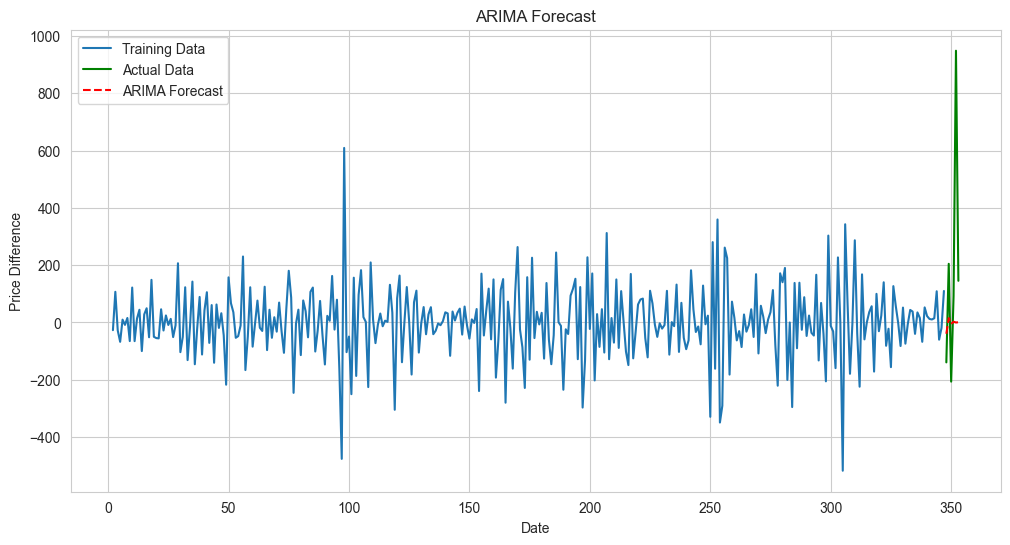

In [35]:
# Visualization of actual and forecasted values for ARIMA model
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_data.index, y=train_data['Price_diff_2'], label='Training Data')
sns.lineplot(x=test_data.index, y=test_data['Price_diff_2'], label='Actual Data', color='green')
sns.lineplot(x=test_data.index, y=arima_forecast, label='ARIMA Forecast', linestyle='--', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.show()

# SARIMA Method

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Visualization of actual and forecasted values for Mean model 

# Fit SARIMA model
model_sarima = SARIMAX(train_data['Price_diff_2'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 12))
model_fit_sarima = model_sarima.fit()

# Forecast
sarima_forecast = model_fit_sarima.forecast(len(test_data))

# Evaluate the metrics for SARIMA model
sarima_mae = mean_absolute_error(test_data['Price_diff_2'], sarima_forecast)
sarima_mse = mean_squared_error(test_data['Price_diff_2'], sarima_forecast)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mape = mean_absolute_percentage_error(test_data['Price_diff_2'], sarima_forecast)

# Print the metrics
print("SARIMA Model:")
print(f"Mean Absolute Error for SARIMA Forecast: {sarima_mae}")
print(f"Mean Squared Error for SARIMA Forecast: {sarima_mse}")
print(f"Root Mean Squared Error for SARIMA Forecast: {sarima_rmse}")
print(f"Mean Absolute Percentage Error for SARIMA Forecast: {sarima_mape}")

SARIMA Model:
Mean Absolute Error for SARIMA Forecast: 279.870369526574
Mean Squared Error for SARIMA Forecast: 169693.02693845003
Root Mean Squared Error for SARIMA Forecast: 411.93813484363164
Mean Absolute Percentage Error for SARIMA Forecast: 0.9363134659756391


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exc

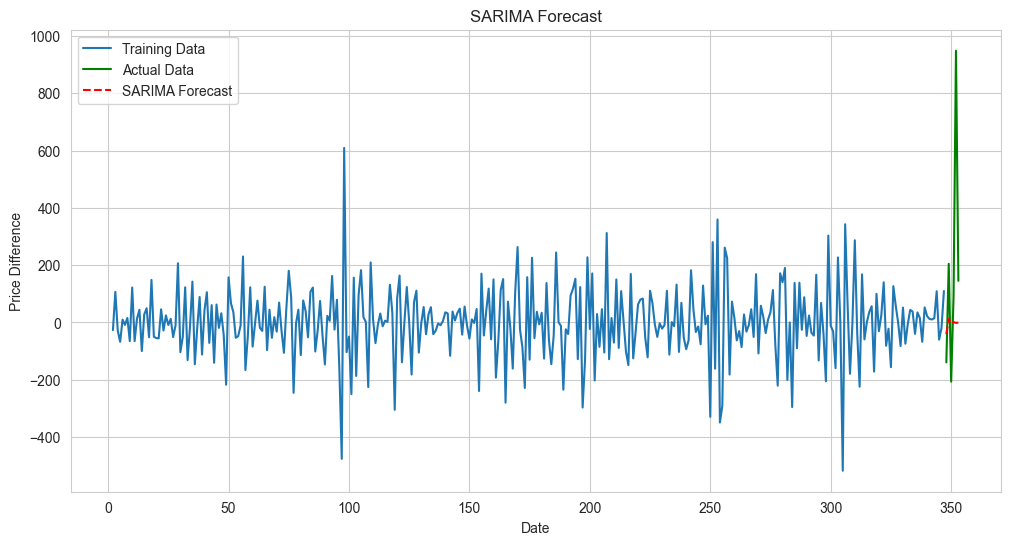

In [37]:
# Visualization of actual and forecasted values for SARIMA model
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_data.index, y=train_data['Price_diff_2'], label='Training Data')
sns.lineplot(x=test_data.index, y=test_data['Price_diff_2'], label='Actual Data', color='green')
sns.lineplot(x=test_data.index, y=sarima_forecast, label='SARIMA Forecast', linestyle='--', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.show()

In [38]:
metrics = {
    "Model": ["Mean", "Naive", "Seasonal Naive", "Simple Exponential Smoothing", 
              "Holt's Linear", "Holt-Winters'", "ARIMA", "SARIMA"],
    "Mean Absolute Error": [289.122986512524, 258.49333333333317, 266.77833333333325, 289.27284944078974,
                            286.739240473798, 275.27477782067086, 278.9114619543155, 279.870369526574],
    "Mean Squared Error": [171810.69504539852, 145829.19976666663, 160245.92331666668, 171966.924529048,
                           169438.3291349741, 160619.9668095735, 169068.61437090996, 169693.02693845003],
    "Root Mean Squared Error": [414.50053684573015, 381.87589576545236, 400.30728611488786, 414.68894912819655,
                                 411.62887305796966, 400.77420926199017, 411.1795403116623, 411.93813484363164],
    "Mean Absolute Percentage Error": [0.9986087630163539, 0.850332149649815, 0.8618067414647163, 0.9994762379743282,
                                        0.9847394025925044, 0.9233049262617189, 0.9309778056914036, 0.9363134659756391]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics)

# Display DataFrame
metrics_df


,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Mean,289.122987,171810.695045,414.500537,0.998609
1,Naive,258.493333,145829.199767,381.875896,0.850332
2,Seasonal Naive,266.778333,160245.923317,400.307286,0.861807
3,Simple Exponential Smoothing,289.272849,171966.924529,414.688949,0.999476
4,Holt's Linear,286.739240,169438.329135,411.628873,0.984739
5,Holt-Winters',275.274778,160619.966810,400.774209,0.923305
6,ARIMA,278.911462,169068.614371,411.179540,0.930978
7,SARIMA,279.870370,169693.026938,411.938135,0.936313
